In [1]:
from random import *
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

In [2]:
n = 80
conditions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0] #zero in the end is necessary


#State probabilities, P == 1 - equiprobable, P == 2 - no

P = 2
if P == 1:
    weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0]
if P == 2:
    weights = [0.14, 0.03, 0.23, 0.01, 0.12, 0.05, 0.03, 0.20, 0.09, 0.10, 0]

In [3]:
#Moore neighborhood

Moor = ((1,1), (0,1), (-1,1), (-1,0), (-1,-1), (0,-1), (1,-1), (1,0))

In [5]:
X = np.zeros((n, n))

for x in range(n):
    for y in range(n):
        X[x, y] = choices(conditions, weights = weights)[0]

In [6]:
stroka, stolbets = np.empty((1, n)), np.empty((n+2, 1))
stroka.fill(np.nan)
stolbets.fill(np.nan)

In [7]:
# Cellular automata

def step(X):
    X = np.concatenate((stroka, X, stroka))
    X = np.concatenate((stolbets, X, stolbets), axis = 1)
    X_new = np.copy(X)
    for x in range(1, n + 1):
        for y in range(1, n + 1):
            for k in range(len(conditions) - 1):
                if X[x, y] == conditions[k]:
                    for dx, dy in Moor:
                        if X[x + dx, y + dy] == conditions[k + 1]:
                            X_new[x, y] = conditions[k + 1]

    return X_new[1:n+1, 1:n+1]

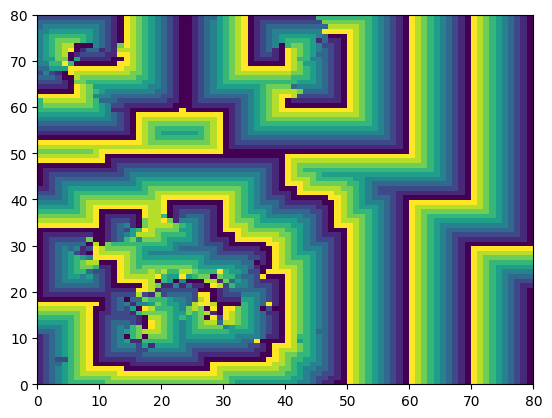

In [8]:
# CA visualization

fig, ax = plt.subplots()
data = np.random.rand(3,3)
heatmap = ax.pcolor(data, cmap='viridis')
fig.canvas.draw()
fig.show()

while True:
    try:
        X=step(X)
        heatmap = ax.pcolor(X)
        #ax.draw_artist(ax.patch)
        ax.draw_artist(heatmap)
        fig.canvas.blit(ax.bbox)
        fig.canvas.flush_events()
    except KeyboardInterrupt:
        break